<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/homework-2/Homework_2_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#### CREDITS: Wencen Wu ####
import numpy as np
import csv

w0, w1, w2 = 0, 0, 0
best_w0, best_w1, best_w2 = w0, w1, w2

temp0,temp1,temp2 = 1,0,1

x1, x2, y = [], [], []
x11,x22,y22 = [],[],[]


rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

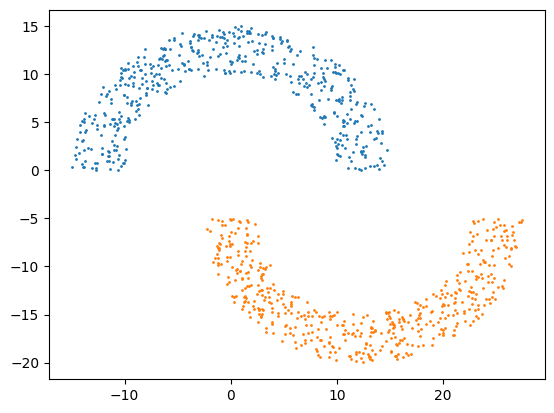

In [64]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

with open('synthetic_dataset.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['x1', 'x2', 'y'])  # Writing header
    for point in top:
        csv_writer.writerow([point[0], point[1], '1'])
    for point in bottom:
        csv_writer.writerow([point[0], point[1], '-1'])

In [65]:
def file_read(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1.append(float(values[0]))
            x2.append(float(values[1]))
            y.append(int(values[2]))
    return x1,x2,y

In [66]:
def misclassified_points():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]

def misclassified_points_2():
    return [(x11[i], x22[i], y22[i]) for i in range(len(x11)) if (w0 + w1 * x11[i] + w2 * x22[i]) * y22[i] <= 0]

In [67]:
def PLA():
    global w0, w1, w2
    w0,w1,w2 = 0,0,0
    for i in range(10000):
        misclassified = misclassified_points()
        if not misclassified:
            break
        x1_misclassified, x2_misclassified, y_misclassified = misclassified[0]
        w0 += y_misclassified
        w1 += y_misclassified * x1_misclassified
        w2 += y_misclassified * x2_misclassified

def PLA_2():
    global w0, w1, w2
    w0,w1,w2 = 0,0,0
    for i in range(10000):
        misclassified = misclassified_points_2()
        if not misclassified:
            break
        x1_misclassified, x2_misclassified, y_misclassified = misclassified[0]
        w0 += y_misclassified
        w1 += y_misclassified * x1_misclassified
        w2 += y_misclassified * x2_misclassified

In [68]:
file_read('synthetic_dataset.csv')
PLA()

Weights obtained from PLA --> w0:  17    w1: 0.01426998154046899    w2:  30.106350064281585


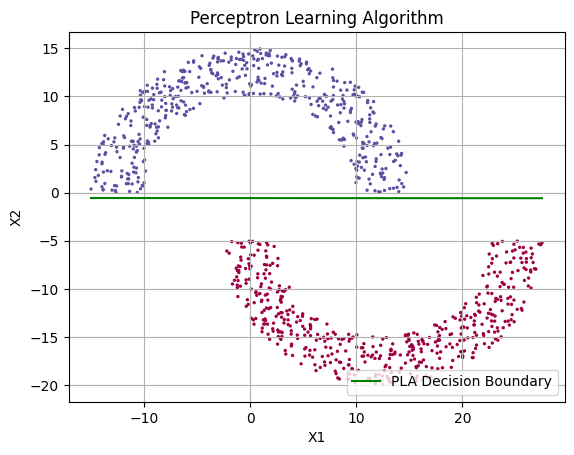

In [69]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral,s=2)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2

plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from PLA -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()

Weights obtained from Linear Regression --> w0:  0.24658356730910935    w1: -0.009094791798248065


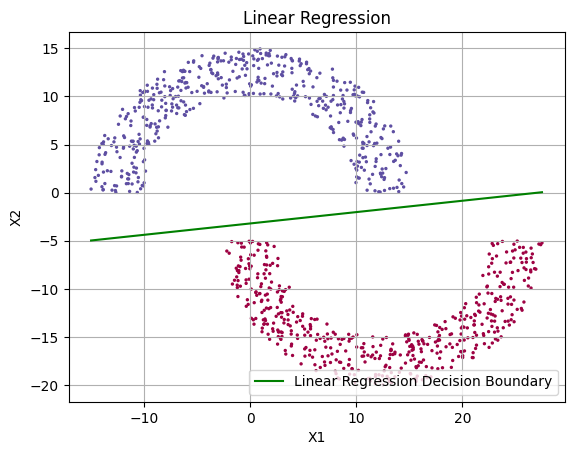

In [70]:
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

# hstack horizontally stacks arrays. We combine intercept, x1, and x2 into a single matrix with three columns
intercept = np.ones((len(x1), 1))
X = np.hstack((intercept, x1.reshape(-1, 1), x2.reshape(-1, 1)))

# Calculation coefficients
XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTy = np.dot(X.T, y)
coefficients = np.dot(XTX_inv, XTy)
w0_lr, w1_lr, w2_lr = coefficients

x1_line_LR = np.linspace(min(x1), max(x1), 100)
x2_line_LR = -(w0_lr + w1_lr * x1_line_LR) / w2_lr

plt.plot(x1_line_LR, x2_line_LR, label='Linear Regression Decision Boundary',color = 'green')
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral,s = 2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear Regression')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from Linear Regression -->", "w0: ",w0_lr,"   w1:",w1_lr)
plt.show()

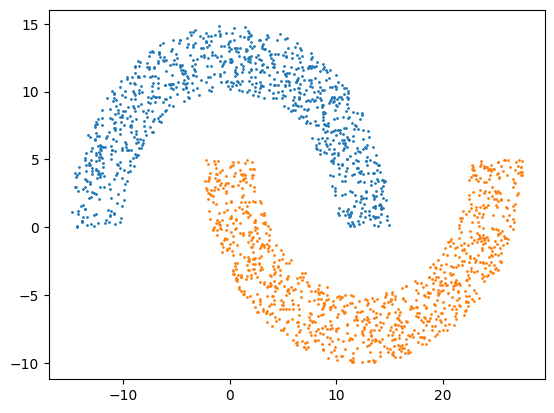

In [71]:
sep = -5
top,bottom = generatedata(rad,thk,sep,2000)

X1_new = [i[0] for i in top]
Y1_new = [i[1] for i in top]

X2_new = [i[0] for i in bottom]
Y2_new = [i[1] for i in bottom]

plt.scatter(X1_new,Y1_new,s = 1)
plt.scatter(X2_new,Y2_new,s = 1)
plt.show()

with open('synthetic_dataset2.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['x1', 'x2', 'y'])  # Writing header
    for point in top:
        csv_writer.writerow([point[0], point[1], '1'])
    for point in bottom:
        csv_writer.writerow([point[0], point[1], '-1'])

In [72]:
def file_read_new(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x11.append(float(values[0]))
            x22.append(float(values[1]))
            y22.append(int(values[2]))
    return x11,x22,y22

Weights obtained from PLA --> w0:  84    w1: -3.241845884953321    w2:  122.89803058933887


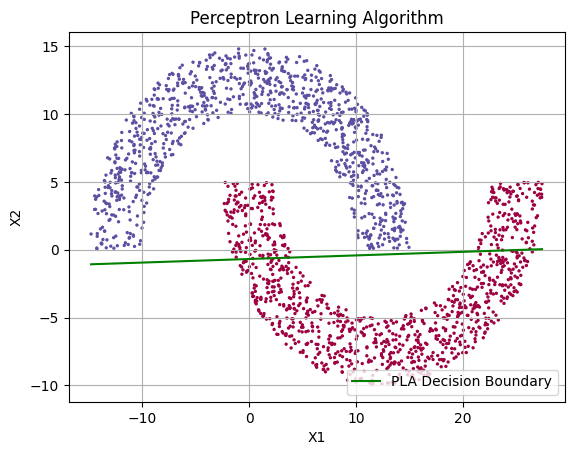

In [73]:
file_read_new('synthetic_dataset2.csv')
PLA_2()


plt.scatter(x11, x22, c=y22, cmap=plt.cm.Spectral,s = 2)

x11_line_PLA = np.linspace(min(x11), max(x11), 100)
x22_line_PLA = -(w0 + w1 * x11_line_PLA) / w2

plt.plot(x11_line_PLA, x22_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from PLA -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()

In [100]:

def pocket_algorithm(x1, x2, y):

    X = np.column_stack((np.ones(len(x1)), x1, x2))

    w = np.zeros(X.shape[1])
    w_pocket = w.copy()
    pocket_error = len(y)

    for _ in range(100000):
        misclassified_indices = np.where(y * np.dot(X, w) <= 0)[0]
        current_error = len(misclassified_indices)

        if current_error < pocket_error:
            w_pocket = w.copy()
            pocket_error = current_error

        if pocket_error == 0:
            break

        if len(misclassified_indices) > 0:
            random_misclassified_index = np.random.choice(misclassified_indices)
            w += y[random_misclassified_index] * X[random_misclassified_index]

    return w_pocket,len(misclassified_indices)

best_weights,misclassified_count_pocket = pocket_algorithm(x11, x22, y22)
print("Best weights (pocket):", best_weights)


Best weights (pocket): [-64.          -5.32830554  40.12573763]


Weights obtained from Pocket --> w0:  -64.0    w1: -5.328305538733911    w2:  40.12573763462363


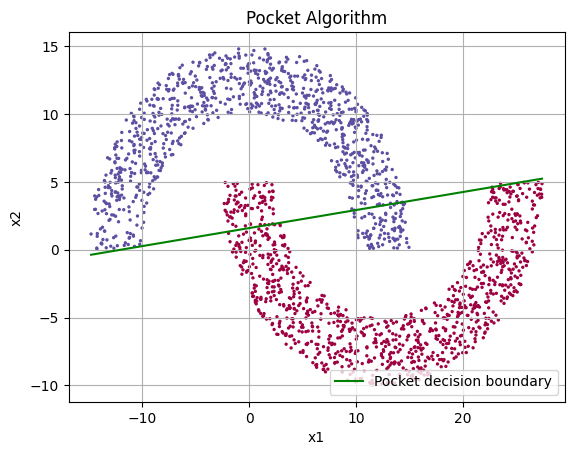

In [101]:
plt.scatter(x11, x22, c=y22, cmap=plt.cm.Spectral,s = 2)
w0,w1,w2 = best_weights
x11_values =  np.linspace(min(x11), max(x11), 100)
x22_values = -(w0 + w1 * x11_values) / w2
plt.plot(x11_values, x22_values, label='Pocket decision boundary', color='green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc = 'lower right')
plt.title('Pocket Algorithm')
plt.grid(True)
print("Weights obtained from Pocket -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()


In [102]:
x11_new = np.array(x11)
x22_new = np.array(x22)
y22_new = np.array(y22)

# hstack horizontally stacks arrays. We combine intercept, x1, and x2 into a single matrix with three columns
intercept = np.ones((len(x11_new), 1))
X = np.hstack((intercept, x11_new.reshape(-1, 1), x22_new.reshape(-1, 1)))

# Calculation coefficients
XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTy = np.dot(X.T, y22_new)
coefficients = np.dot(XTX_inv, XTy)
w0_lr, w1_lr, w2_lr = coefficients

misclassified_lr = 0

for i in range(len(x1)):
  if (w0_lr + w1_lr*x11[i] + w2_lr*x22[i] > 0 and y[i] < 0) or (w0_lr + w1_lr*x11[i] + w2_lr*x22[i] < 0 and y[i] > 0):
    misclassified_lr +=1


308 474


Weights obtained from Linear Regression --> w0:  -0.13665862577340523    w1: -0.020365121063938344
error percentage of pocket is: 15.4 %
error percentage of linear regression is 23.7 %


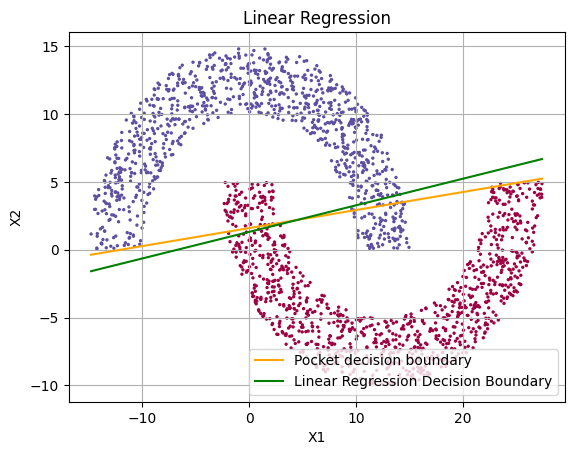

In [106]:
x1_line_LR = np.linspace(min(x11_new), max(x11_new), 100)
x2_line_LR = -(w0_lr + w1_lr * x1_line_LR) / w2_lr
plt.plot(x11_values, x22_values, label='Pocket decision boundary', color='orange')

plt.plot(x1_line_LR, x2_line_LR, label='Linear Regression Decision Boundary',color = 'green')
plt.scatter(x11, x22, c=y22, cmap=plt.cm.Spectral,s = 2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear Regression')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from Linear Regression -->", "w0: ",w0_lr,"   w1:",w1_lr)
print("error percentage of pocket is:",(misclassified_count_pocket/len(x11))*100,"%")
print("error percentage of linear regression is",(misclassified_lr/len(x11))*100,"%")
plt.show()

In [160]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

x11_3 = np.ravel(x11)
x22_3 = np.ravel(x22)
y22_3 = np.ravel(y22)


X = np.column_stack((x11_3, x22_3))
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

def pocket_algorithm_3rd_degree(X_poly, y):
    w = np.zeros(X_poly.shape[1])
    w_pocket = w.copy()
    pocket_error = len(y)

    for _ in range(100000):
        misclassified_indices = np.where(y * np.dot(X_poly, w) <= 0)[0]
        current_error = len(misclassified_indices)

        if current_error < pocket_error:
            w_pocket = w.copy()
            pocket_error = current_error

        if pocket_error == 0:
            break

        if len(misclassified_indices) > 0:
            random_misclassified_index = np.random.choice(misclassified_indices)
            w += y[random_misclassified_index] * X_poly[random_misclassified_index]

    return w_pocket, len(misclassified_indices)

best_weights, misclassified_count_pocket = pocket_algorithm_3rd_degree(X_poly, y)

print(best_weights)




[ -2.  -8.  -1. -28.  -6.  13. -86. -12.  46. 107.]


TypeError: ignored

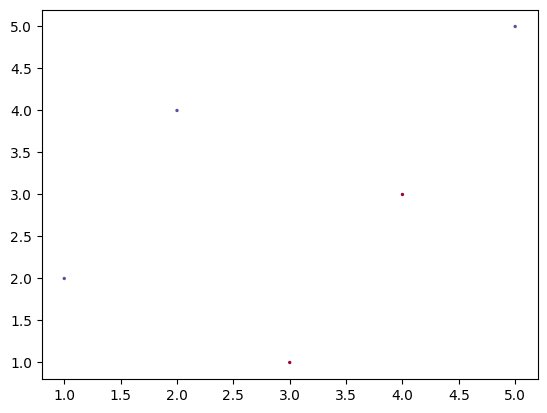

In [168]:
plt.scatter(x11, x22, c=y22, cmap=plt.cm.Spectral,s = 2)
w0,w1,w2,w3,w4,w5,w6,w7,w8,w9 = best_weights
x11_values =  np.linspace(min(x11), max(x11), 100)
x22_values = w0 + w1 * x1 + w2 * x2 + w3 * x1**2 + w4 * x1 * x2 + w5 * x2**2 + w6 * x1**3 + w7 * x1**2 * x2 + w8 * x1 * x2**2 + w9 * x2**3
plt.plot(x11_values, x22_values, label='Pocket decision boundary', color='green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc = 'lower right')
plt.title('Pocket Algorithm')
plt.grid(True)
print("Weights obtained from Pocket -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()